In [86]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
df = pd.read_pickle('data/sf_inspection.pkl')

In [4]:
df.head(2)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.7898,-122.42,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11
1,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.7592,-122.419,"(37.759174, -122.419066)",1.415583e+10,...,0,0,0,0,0,0,0,0,0,13


## Assign average values to the missing longitude and latitude values

In [7]:
mask = df['business_latitude'].isnull().values

In [22]:
sum_latitude = df['business_latitude'].loc[~mask].values.astype(float).sum()
len_latitude = len(df['business_latitude'].loc[~mask].values)
avg_latitude = sum_latitude/len_latitude
avg_latitude

37.74832209185429

In [23]:
sum_longitude = df['business_longitude'].loc[~mask].values.astype(float).sum()
len_longitude = len(df['business_longitude'].loc[~mask].values)
avg_longitude = sum_longitude/len_longitude
avg_longitude

-122.38254114681624

In [26]:
df.loc[mask,'business_latitude'] = avg_latitude
df.loc[mask,'business_longitude'] = avg_longitude

## 2-dim plot

In [58]:
# get rid of two wrong geo locations
mask_80 = df['business_longitude'].values.astype(float) > -80.
df.loc[mask_80]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
808,5509,AT&T - (CART 33) PRETZELS GRILL [145120],24 Pl,San Francisco,CA,94107,-32.9013977,-60.7018693,NaN,1.415597e+10,...,0,0,0,0,0,0,0,0,0,2
2465,68500,Drip! Mobile Espresso,Treasure Island Flea Market,San Francisco,CA,94130,0,0,"(0, 0)",NaN,...,0,1,0,0,0,0,0,0,0,5


In [59]:
df2 = df.loc[~mask_80]
len(df2)

4695

In [60]:
a = df2['business_longitude'].values.astype(float)
b = df2['business_latitude'].values.astype(float)

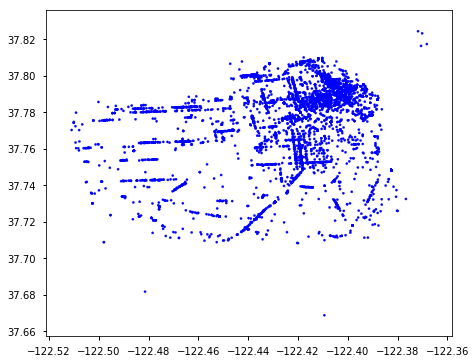

In [81]:
#fig = plt.figure
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)

#ax=fig.add
# a = np.random.randint(1000, size=50)
# b = np.random.randint(1000, size=50)
col = np.where((a+b) % 2== 0, 'r','b')
ax1.scatter(a, b, c=col, s=5)

In [63]:
x = np.array(a)
y = np.array(b)

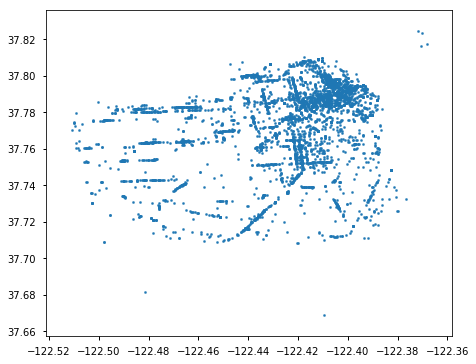

In [80]:
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(121)
ax1.scatter(x,y, s=5)

In [82]:
y = df2['y_label']
X = df2[['p10_12', 'p13_18', 'p19_24', 'p25_36', '94013', '94014', '94080', '94101', '94102', '94103', '94104',
       '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114',
       '94115', '94116', '94117', '94118', '94120', '94121', '94122', '94123',
       '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134',
       '94143', '94158']]

In [83]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

In [84]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

In [112]:
kscore = []
for n in range(10):
    K_means = cluster.KMeans(n_clusters=n+2)
    K_means.fit(X_train)
    asum = sum(K_means.labels_ == y_train)/len(y_train)
    kscore.append(asum)
    

In [97]:
# print(K_means.labels_[::10])
# print(y_train[::10])

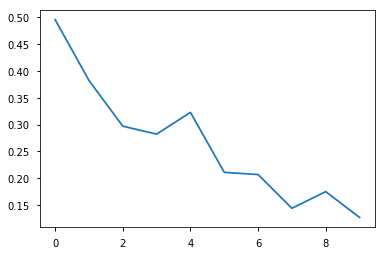

In [113]:
plt.plot(kscore)